In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%config InlineBackend.figure_format = 'svg'
orange = "#ff8c00"
blue = "#4173b3"
green = "#66cdaa"
red = "#e85c47"
gray= "#909090"
colors=[green,blue,orange]
linecolors=[red,orange,gray]
π=np.pi
ratio=1.32

# Functions declaration

In [2]:
def log_factorial(Nmax):
    logfactorial=np.zeros(Nmax+1)
    for N in range(1,Nmax+1):
        logfactorial[N]=logfactorial[N-1]+np.log(N)
    return logfactorial

def draw_line(slope, intercept,axes,factor):
    x_vals = np.array(axes.get_xlim())
    y_vals = (intercept + slope * x_vals)*factor
    axes.plot(x_vals, y_vals, '--',color="#000000",linewidth=1)
    
def Linear_fit_S(nPower,S):
    fitlim=int(np.size(nPower)*(7/8))
    coefficients = np.polyfit(nPower[fitlim:-1], S[fitlim:-1], deg=1)
    slope = coefficients[0]
    intercept = coefficients[1]
    return slope,intercept

# half of the distribution
def Prob(N,pμ,p):
    Pn=np.zeros(int(N/2)+1)
    lnPn=np.zeros(int(N/2)+1)
    μ=1.0*N**pμ
    for n in range(0,int(N/2)+1):
        Pn[n]=np.exp(-n**p/μ)
        lnPn[n]=-n**p/μ
    A=0.0
    if int(N/2)==N/2:
        A=2*sum(Pn)-Pn[int(N/2)]
    else:
        A=2*sum(Pn)
    return Pn/A,lnPn-np.log(A)

def N_values(Nmax,num_poimts,power,SkipEvenN):
    nVal=[]
    nPower=[]
    nVal.append(1)
    if power==0:
        step=np.log(Nmax)/num_poimts
        nPower.append(0)
    else:
        step=(Nmax)**power/num_poimts
        nPower.append(1)
    niOld=1
    
    for i in range(1,num_poimts):
        if power==0:
            niNew=int(np.exp(np.log(niOld)+step))
        else:
            niNew=int(((niOld)**power+step)**(1/power))
            
        if niNew<=niOld:
            niNew=niOld+1
        if SkipEvenN and niNew/2==int(niNew/2):
            niNew+=1
        if niNew>Nmax:
            break
        nVal.append(niNew)
        if power==0:
            nPower.append(np.log(niNew))
        else:
            nPower.append((niNew)**power)
        niOld=niNew
    nVal=np.array(nVal)
    nPower=np.array(nPower)
    num_poimts=np.size(nVal)
    return nVal,nPower,num_poimts

def N_values_state(Nmax,num_poimts,power,SkipEvenN):
    nVal=[]
    nPower=[]
    nVal.append(1)
    if power==0:
        step=np.log(Nmax)/num_poimts
        nPower.append(0)
    else:
        step=(Nmax)**power/num_poimts
        nPower.append(1)
    niOld=1
    
    for i in range(1,num_poimts):
        if power==0:
            niNew=int(np.exp(np.log(niOld)+step))
        else:
            niNew=int(((niOld)**power+step)**(1/power))
            
        if niNew<=niOld:
            niNew=niOld+1
        if SkipEvenN and niNew/2==int(niNew/2):
            niNew+=1
        if niNew>Nmax:
            break
        nVal.append(niNew)
        if power==0:
            nPower.append(np.log(niNew))
        else:
            nPower.append((niNew)**power)
        niOld=niNew
    nVal=np.array(nVal)
    nPower=np.array(nPower)
    num_poimts=np.size(nVal)
    return nVal,nPower,num_poimts
def S_α(N,α,pσ,p,B=2):
    Pn,lnPn=Prob(N,pσ,p)
    P_error=abs(2*sum(Pn)-Pn[int(N/2)]*(1-N+int(N/2)*2)-1)
    if P_error>1e-10:
        print("P_error=",P_error)
    Sα=0.0
    Sαavg=0.0
    if int(N/2)==N/2:
        f=1.0
    else:
        f=2.0
    n=int(N/2)
    if α==1:
        element=-Pn[n]*lnPn[n]+Pn[n]*(B*n)
        Sα+=f*element
    else:
        if α<1:
            element0=α*lnPn[n]+(1-α)*(B*n)
            Sα+=f#*np.exp(element0)
        else:
            element0=α*lnPn[n]+(1-α)*(B*n)
            Sα+=f*np.exp(element0)
            element0=0
    element2=(B*n)
    Sαavg+=f*element2*Pn[n]      
    for n in range(int(N/2)-1,-1,-1):
        if α==1:
            element=-Pn[n]*lnPn[n]+Pn[n]*(B*n)
            Sα+=2*element
        else:
            element=α*lnPn[n]+(1-α)*(B*n)-element0
            Sα+=2*np.exp(element)
        element2=(B*n)
        Sαavg+=2*element2*Pn[n]
    if α!=1:
        Sα=1/(1-α)*(np.log(Sα)+element0)  
    return Sα,Sαavg
def S_α_state(N,α,pσ,p,logfactorial):
    Pn,lnPn=Prob(N,pσ,p)
    P_error=abs(2*sum(Pn)-Pn[int(N/2)]*(1-N+int(N/2)*2)-1)
    if P_error>1e-10:
        print("P_error=",P_error)
    Sα=0.0
    Sαavg=0.0
    if int(N/2)==N/2:
        f=1.0
    else:
        f=2.0
    n=int(N/2)
    if α==1:
        element=-Pn[n]*lnPn[n]+Pn[n]*(logfactorial[N]-logfactorial[n]-logfactorial[N-n])
        Sα+=f*element
    else:
        if α<1:
            element0=α*lnPn[n]+(1-α)*(logfactorial[N]-logfactorial[n]-logfactorial[N-n])
            Sα+=f#*np.exp(element0)
        else:
            element0=α*lnPn[n]+(1-α)*(logfactorial[N]-logfactorial[n]-logfactorial[N-n])
            Sα+=f*np.exp(element0)
            element0=0
    element2=(logfactorial[N]-logfactorial[n]-logfactorial[N-n])
    Sαavg+=f*element2*Pn[n]
    for n in range(int(N/2)-1,-1,-1):
        if α==1:
            element=-Pn[n]*lnPn[n]+Pn[n]*(logfactorial[N]-logfactorial[n]-logfactorial[N-n])
            Sα+=2*element
        else:
            element=α*lnPn[n]+(1-α)*(logfactorial[N]-logfactorial[n]-logfactorial[N-n])-element0
            Sα+=2*np.exp(element)
        element2=(logfactorial[N]-logfactorial[n]-logfactorial[N-n])
        Sαavg+=2*element2*Pn[n]
    if α!=1:
        Sα=1/(1-α)*(np.log(Sα)+element0)
    
    return Sα,Sαavg
def P_n(N,μ): 
    Pn=np.zeros([N+1])
    for n in range(int(N/2)+1):
        Pn[n]=np.exp(-n/μ)
        Pn[N-n]=np.exp(-n/μ)
    if N/2==int(N/2):
        Pn[int(N/2)]=np.exp(-N/2.0/μ)
    return Pn
def S_n(N,B): 
    Sn=np.zeros([N+1])
    for n in range(int(N/2)+1):
        Sn[n]=B*n
        Sn[N-n]=B*n
    if N/2==int(N/2):
        Sn[int(N/2)]=B*N/2
    return Sn
def A_N(N,μ): 
    if N/2==int(N/2):
        A=1/((2-np.exp(-(N/2/μ))-np.exp(-((N/2+1)/μ)))/(1-np.exp(-1/μ)))
    else:
        A=1/(2*(1-np.exp(-(N+1)/2/μ))/(1-np.exp(-1/μ)))
    return A

In [3]:
Nmax=1000000
pμ=0.5
p=1
logfactorial=log_factorial(Nmax)
αs=[2,1,0.5]
αl=['2','1',r'$\frac{1}{2}$']
γs=[0,0.5,1.0]
num_poimts_int=[40,32,34]
Nfactors=[1.5*10**2,1.0,2*10**-3]
NfactorsTex=[r'$\mathcal{N}_{2}$',r'$\mathcal{N}_{1}$',r'$\mathcal{N}_{\frac{1}{2}}$']

# Figure (1)

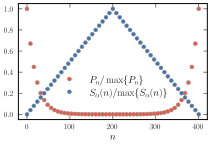

In [4]:
N=400
μ=20
B=2
Pn=np.zeros(N+1)
Sn=np.zeros(N+1)
AN=A_N(N,μ)
Pn=AN*P_n(N,μ)
ni=np.zeros(N+1)
for i in range(N+1):
    ni[i]=i    
Sn=S_n(N,B)
with plt.style.context('./aps.mplstyle'):
    fig = plt.figure()
    gs = gridspec.GridSpec(1, 1, height_ratios=[ 1])
    ax1 = plt.subplot(gs[0])
    ax1.plot(ni[0::8],Pn[0::8]/max(Pn) ,'.', label=r'$P_n/\max\{P_n\}$', ms = 8, color=gray,mfc=red,markeredgewidth = '0.5')
    ax1.plot(ni[0::8],Sn[0::8]/max(Sn) ,'.', label=r'$S_{\alpha}(n)/{\max\{S_{\alpha}(n)\}}$', ms = 8, color=gray,mfc=blue,markeredgewidth = '0.5')
    plt.xlabel(r'$n$',x=.5)
    lgnd = plt.legend(loc=(0.17,0.15),handlelength=3,handleheight=1, title= r'', frameon=False)
    lgnd.get_title().set_fontsize(14)
    lgnd.get_title().set_position((12,0))

    plt.savefig('PnvsSn.pdf', transparent=False)
    plt.savefig('PnvsSn.png', transparent=False)
    plt.show()

# Figure (2)

In [5]:
Num_Poimts=[]
S=[]
Savg=[]
nVals=[]
nPowers=[]
for i,α in enumerate(αs):
    nVal,nPower,num_poimts= N_values(Nmax,num_poimts_int[i],γs[i],True)
    nVals.append(nVal)
    nPowers.append(nPower)
    Num_Poimts.append(num_poimts)
    Si=np.zeros([num_poimts])
    Savgi=np.zeros(num_poimts)
    for j in range(num_poimts):
        SαN,Sαavg=S_α(nVal[j],αs[i],pμ,p)
        Si[j]=SαN
        Savgi[j]=Sαavg
    S.append(Si)
    Savg.append(Savgi)

In [6]:
nVals_1,nPower_1,num_poimts_1= N_values(4*Nmax,100,γs[1],True)
Sth2=np.zeros(len(nVals_1))
for j in range(len(nVals_1)):
    SαN,Sαavg=S_α(nVals_1[j],αs[0],pμ,p)
    Sth2[j]=SαN
Sthp5=np.zeros(len(nVals_1))
for j in range(len(nVals_1)):
    SαN,Sαavg=S_α(nVals_1[j],αs[2],pμ,p)
    Sthp5[j]=SαN
Sht1=np.zeros(len(nVals_1))
for j in range(len(nVals_1)):
    SαN,Sαavg=S_α(nVals_1[j],αs[1],pμ,p)
    Sht1[j]=SαN
nVals1=nVals[1]

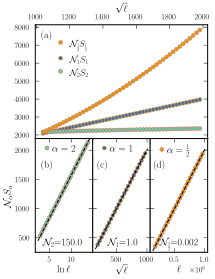

In [7]:
xmax=150
xmin=52
x=6
xl=[3.5,350,250000 ]
yl=[370.0,370.0,370]
plt.style.reload_library()
with plt.style.context('./aps.mplstyle'):
    fig = plt.figure(figsize=[3.0*1,3.0*ratio])
    
    # sub_figure(a)
    ax =fig.add_subplot(211)
    ax.plot(nVals_1[xmin:xmax]**.5,(Sthp5)[xmin:xmax]*Nfactors[2],'o',label=NfactorsTex[2]+r'$S_{\frac{1}{2}}$',zorder=3,ms=4.0,mfc=colors[2],c=linecolors[2],markeredgewidth = '0.5')
    ax.plot(nVals_1[xmin:xmax]**.5,(Sht1)[xmin:xmax]*Nfactors[1],'o',label=NfactorsTex[1]+r'$S_1$ ',zorder=1,ms=4.0,mfc=colors[1],c=linecolors[1],markeredgewidth = '0.5')
    ax.plot(nVals_1[xmin:xmax]**.5,(Sth2)[xmin:xmax]*Nfactors[0],'o',label=NfactorsTex[0]+r'$S_2$',zorder=2,ms=4.0,mfc=colors[0],c=linecolors[0],markeredgewidth = '0.5')
    lgnd = plt.legend(loc=(0.1,0.50), fontsize=9, handlelength=1,handleheight=1.5,title=None,frameon=False)
    ax.tick_params(axis='x',bottom=False, top=True, labelbottom=False, labeltop=True)
    ax.set_xlabel(r'$\sqrt{\ell}$')
    ax.xaxis.set_label_position('top')
    ax.text(1025,7400 , "(a)")
    
    # sub_figure(b)
    ax1 =fig.add_subplot(234)
    Si=S[0]
    Savgi=Savg[0]
    nPoweri=nPowers[0]
    nPowerv=nPowers[0]
    ax1.plot(nPoweri[x:],Si[x:]*Nfactors[0],'o',label=r'$\alpha=$ '+αl[0],zorder=1,ms=4.0,mfc=colors[0],c=linecolors[0],markeredgewidth = '0.5')
    slope,intercept=Linear_fit_S(nPowerv,Si)
    draw_line(slope, intercept,ax1,Nfactors[0]) 
    ax1.legend(loc='upper left', bbox_to_anchor=(-.075, 1.0), facecolor=None,framealpha=0.8, frameon=True, edgecolor='None', borderpad=0.1,handletextpad=-.5)
    ax1.text(xl[0], yl[0], NfactorsTex[0]+'='+str(Nfactors[0]))
    ax1.set_ylim(250,2200)
    ax1.set_ylabel(r'$\mathcal{N}_{\alpha} S_{\alpha}$')
    ax1.set_xlabel(r'${\ln\ell}$')
    ax1.text(3,1700 , "(b)")

    # sub_figure(c)
    ax2 =fig.add_subplot(235)
    Si=S[1]
    Savgi=Savg[1]
    nPoweri=nPowers[1]
    nPowerv=nPowers[1]
    ax2.plot(nPoweri[x:],Si[x:]*Nfactors[1],'o',label=r'$\alpha=$ '+αl[1],zorder=1,ms=4.0,mfc=colors[1],c=linecolors[1],markeredgewidth = '0.5')
    slope,intercept=Linear_fit_S(nPowerv,Si)
    draw_line(slope, intercept,ax2,Nfactors[1]) 
    ax2.legend(loc='upper left', bbox_to_anchor=(-.075, 1.0), facecolor=None,framealpha=0.8, frameon=True, edgecolor='None', borderpad=0.1,handletextpad=-.5)
    ax2.text(xl[1], yl[1], NfactorsTex[1]+'='+str(Nfactors[1]))
    ax2.set_xlabel(r'$\sqrt{\ell}$')
    ax2.set_ylabel(None)
    ax2.set_ylim(250,2200)
    ax2.text(170,1700 , "(c)")
    ax2.set_yticklabels([])
    
    # sub_figure(d)
    ax3 =fig.add_subplot(236)
    Si=S[2]
    Savgi=Savg[2]
    nPoweri=nPowers[2]
    nPowerv=nPowers[2]
    ax3.plot(nPoweri[x:],Si[x:]*Nfactors[2],'o',label=r'$\alpha=$ '+αl[2],zorder=1,ms=4.0,mfc=colors[2],c=linecolors[2],markeredgewidth = '0.5')
    slope,intercept=Linear_fit_S(nPowerv,Si)
    draw_line(slope, intercept,ax3,Nfactors[2]) 
    ax3.legend(loc='upper left', bbox_to_anchor=(-.075, 1.0), facecolor=None,framealpha=0.8, frameon=True, edgecolor='None', borderpad=0.1,handletextpad=-.5)
    ax3.text(xl[2], yl[2], NfactorsTex[2]+'='+str(Nfactors[2]))
    ax3.text(140000,1700 , "(d)")
    ax3.set_ylim(250,2200)
    ax3.set_yticklabels([])
    ax3.set_xlabel(r'${\ell}$')
    
    plt.subplots_adjust(wspace=0.0, hspace=0.0, top=0.9, bottom=0.1, left=0.1, right=0.9)
    plt.savefig('EntanglementEntropyScaling_spectrum.pdf', transparent=False)    
    plt.savefig('EntanglementEntropyScaling_spectrum.svg', transparent=False)    
    plt.show()

# Figure (3)

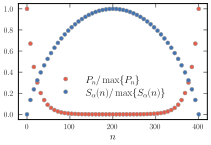

In [8]:
N=400
μ=20
B=2
logfactorial=log_factorial(N)
Pn=np.zeros(N+1)
Sn=np.zeros(N+1)
AN=A_N(N,μ)
Pn=AN*P_n(N,μ)
ni=np.zeros(N+1)

for i in range(N+1):
    ni[i]=i
    Sn[i]=(logfactorial[N]-logfactorial[i]-logfactorial[N-i])

with plt.style.context('./aps.mplstyle'):
    fig = plt.figure()
    gs = gridspec.GridSpec(1, 1, height_ratios=[ 1])
    ax1 = plt.subplot(gs[0])
    ax1.plot(ni[0::8],Pn[0::8]/max(Pn) ,'.', label=r'$P_n/\max\{P_n\}$', ms = 8, color=gray,mfc=red,markeredgewidth = '0.5')
    ax1.plot(ni[0::8],Sn[0::8]/max(Sn) ,'.', label=r'$S_{\alpha}(n)/\max\{S_{\alpha}(n)\}$', ms = 8, color=gray,mfc=blue,markeredgewidth = '0.5')
    plt.xlabel(r'$n$',x=.5)
    lgnd = plt.legend(loc=(0.15,0.15),handlelength=3,handleheight=1, title= r'', frameon=False)
    lgnd.get_title().set_fontsize(14)
    lgnd.get_title().set_position((12,0))

    plt.savefig('PnvsSnState.pdf', transparent=False)
    plt.savefig('PnvsSnState.png', transparent=False)
    plt.show()

# Figure (4)

In [9]:
Nmax=1000000
pσ=0.5
p=1
logfactorial=log_factorial(Nmax)
αs=[2,1,0.5]
αl=['2','1',r'$\frac{1}{2}$']
γs=[0,0.5,1.0]
num_poimts_int=[40,32,34]
Nfactors=[5*10**2,1.0,10**-2]
NfactorsTex=[r'$\mathcal{N}_{2}$',r'$\mathcal{N}_{1}$',r'$\mathcal{N}_{\frac{1}{2}}$']

In [10]:
Num_Poimts=[]
S=[]
Savg=[]
nVals=[]
nPowers=[]
for i,α in enumerate(αs):
    nVal,nPower,num_poimts= N_values_state(Nmax,num_poimts_int[i],γs[i],True)
    nVals.append(nVal)
    nPowers.append(nPower)
    Num_Poimts.append(num_poimts)
    Si=np.zeros([num_poimts])
    Savgi=np.zeros(num_poimts)
    for j in range(num_poimts):
        SαN,Sαavg=S_α_state(nVal[j],αs[i],pσ,p,logfactorial)
        Si[j]=SαN
        Savgi[j]=Sαavg
    S.append(Si)
    Savg.append(Savgi)

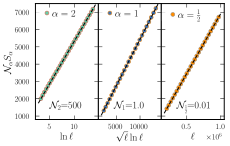

In [11]:
x=6
start=1
xl=[5.0,4500,350000 ]
yl=[1450.0,1450.0,1450]
with plt.style.context('./aps.mplstyle'):
    figsize = plt.rcParams['figure.figsize']
    fig,axes = plt.subplots(nrows=1,ncols=3,sharex=False, sharey=True, figsize=(1*figsize[0],1.*figsize[1]))
    for i in range(3):
        Si=S[i][start:]
        nPoweri=nPowers[i][start:]
        nPowerv=nPowers[i][start:]*np.log(nPowers[i][start:])*2
        if i==1:
            axes[i].plot(nPoweri[x:]*np.log(nPoweri[x:])*2,Si[x:]*Nfactors[i],'o',label=r'$\alpha=$ '+αl[i],zorder=1,ms=4.0,mfc=colors[i],c=linecolors[i],markeredgewidth = '0.5')
            slope,intercept=Linear_fit_S(nPowerv,Si)
        else:
            axes[i].plot(nPoweri[x:],Si[x:]*Nfactors[i],'o',label=r'$\alpha=$ '+αl[i],zorder=1,ms=4.0,mfc=colors[i],c=linecolors[i],markeredgewidth = '0.5')
            slope,intercept=Linear_fit_S(nPoweri,Si)
        draw_line(slope, intercept,axes[i],Nfactors[i]) 
        axes[i].legend(loc='upper left', bbox_to_anchor=(-.07, 1.0), facecolor=None,framealpha=0.8, frameon=True, edgecolor='None', borderpad=0.1,handletextpad=-.5)
        axes[i].text(xl[i], yl[i], NfactorsTex[i]+'='+str(Nfactors[i]))
    axes[0].set_ylabel(r'$\mathcal{N}_{\alpha} S_{\alpha}$')
    axes[0].set_xlabel(r'${\ln\ell}$')
    axes[1].set_xlabel(r'$\sqrt{\ell}\ln\ell$')
    axes[2].set_xlabel(r'${\ell}$')
    axes[0].set_ylim(800,7500)
    #axes[0].set_ylim(0,100)
    plt.subplots_adjust(wspace=0)
    plt.savefig('EntanglementEntropyScaling_state.pdf', transparent=False)    
    plt.savefig('EntanglementEntropyScaling_state.svg', transparent=False)    
    plt.show()

# Figure (5)

In [12]:
S2m=np.zeros(len(S[2]))
for j in range(len(S[2])):
    SαN,Sαavg=S_α_state(nVals[2][j],αs[0],pμ,p,logfactorial)
    S2m[j]=SαN
S1m=np.zeros(len(S[2]))
S1avgm=np.zeros(len(S[2]))
for j in range(len(S[2])):
    SαN,Sαavg=S_α_state(nVals[2][j],αs[1],pμ,p,logfactorial)
    S1m[j]=SαN
    S1avgm[j]=Sαavg
nVals0=nVals[2]
S1=S[1]
Savg1=Savg[1]

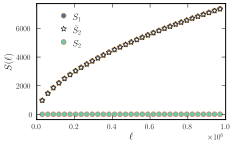

In [13]:
xmax=1000
xmin=1
plt.style.reload_library()
with plt.style.context('./aps.mplstyle'):
    fig = plt.figure()
    #Principal Plot
    ax =fig.add_subplot(111)
    ax.plot(nVals0[xmin:xmax],(S1m)[xmin:xmax],'o',label=r'$S_1$ ',zorder=1,ms=5.0,mfc=colors[1],c=linecolors[1],markeredgewidth = '0.5')
    ax.plot(nVals0[xmin:xmax], (S1avgm)[xmin:xmax],'*',label=r'$\bar{S}_2$ ',zorder=1,ms=6.0,mfc="#ffffff",c="#000000",markeredgewidth = '0.5')
    ax.plot(nVals0[xmin:xmax],(S2m)[xmin:xmax],'o',label=r'$S_2$ ',zorder=1,ms=5.0,mfc=colors[0],c=linecolors[0],markeredgewidth = '0.5')
    ax.set_xlabel(r'${\ell}$')
    ax.set_ylabel(r'$S(\ell)$')
    ax.set_xlim(0, 1.0*10**6)
    lgnd = plt.legend(loc=(0.1,0.58), fontsize=9, handlelength=1,handleheight=1.5,title=None,frameon=False)
    plt.savefig('EntanglementEntropyAverage.pdf', transparent=False)    
    plt.savefig('EntanglementEntropyAverage.svg', transparent=False)    
    plt.show()